# **Setting Up Python Environment**

Google Colaboratory has some dependency issues with installing Magnitude due to conflicting dependencies. I use the following snippet to install Magnitude on Google Colaboratory:

In [3]:
# Install Magnitude on Google Colab
! echo "Installing Magnitude.... (please wait, can take a while)"
! (curl https://raw.githubusercontent.com/plasticityai/magnitude/master/install-colab.sh | /bin/bash 1>/dev/null 2>/dev/null)
! echo "Done installing Magnitude."

Installing Magnitude.... (please wait, can take a while)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   137  100   137    0     0    309      0 --:--:-- --:--:-- --:--:--   309
Done installing Magnitude.


In [8]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from pymagnitude import *
file_path = '/content/drive/My Drive/GoogleNews-vectors-negative300.magnitude'
vectors = Magnitude(file_path)

For instance, the distance of 'cat' and 'dog' is:

In [11]:
vectors.distance("cat",'dog')

0.69145405

# **Q1** What is the dimensionality of these word embeddings? Provide an integer answer.

In [12]:
vectors.dim

300

The dimensionality of these word embeddings is 300.

# **Q2** What are the top-5 most similar words to picnic (not including picnic itself)?

In [13]:
vectors.most_similar("picnic", topn = 6) # Most similar by key

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216)]

According to the similarity by key, the top-5 most similar words to picnic are: picnics, picnic_lunch, potluck_picnic, Picnic(capitalize the first letter, which is different to picnic), picnic_supper

In [14]:
vectors.most_similar(vectors.query("picnic"), topn = 6) # Most similar by vector

[('picnic', 0.9999998),
 ('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

Overall, the similarities by vector are apparently more higher then that by key. According to the similarity by vector, the top-5 most similar words to picnic are: picnics, picnic_lunch, Picnic(capitalize the first letter, which is different to picnic), potluck_picnic, picnic_supper. There are exactly the same words as the words from the similarity by key.

# **Q3** According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [15]:
vectors.doesnt_match(['tissue', 'papyrus','manila', 'newsprint', 'parchment', 'gazette']) 

'tissue'

The word 'tissue' is not like the other 5 words.

# **Q4** Solve the following analogy: leg is to jump as X is to throw.

In [16]:
vectors.most_similar(positive = ["leg","throw"], negative = ["jump"])

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

The word with the highest similarity is 'forearm'. Thus, the solution is: leg is to jump as forearm is to throw.

Then, I use a function to visualize the word list in Q4. To make this function, I should import some packages below.

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

When I define the function, I use Principle components analysis (PCA) to reduce the dimentionality of the word_list from 300 to 2, which is a good way to compress the information of the words and visualize them.

In [36]:
def word_plot(word_list):
  i = 1
  pca = PCA(n_components=2)
  for word in word_list:
    c = vectors.query(word)
    if i <= 1:
      w = vectors.query(word)
      i += 1
    else:
      w = np.vstack((w, c))
  
  result = pca.fit_transform(w)
  x = result[:,0]
  y = result[:,1]
  ax = plt.subplot(1,1,1)
  for j in range(len(word_list)):
    ax.text(x[j],y[j],word_list[j],va='center',ha='right')
  ax.scatter(x,y)

The visualization result of the word list in Q4 is shown below:

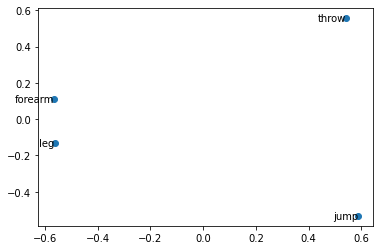

In [37]:
word_list = ['leg', 'throw', 'jump', 'forearm']
word_plot(word_list)

As is shown in the plot above, the 'leg' and the 'forearm' are very close, which means that they are the same type of words. Additionally, except those two words, 'throw' is more close to 'forearm' than 'jump', and 'jump' is more close to 'leg' than 'throw'. The distance between 'jump' and 'leg' is almost equal to the distance between 'throw' and 'forearm'. This result demonstrates the solution: leg is to jump as forearm is to throw.